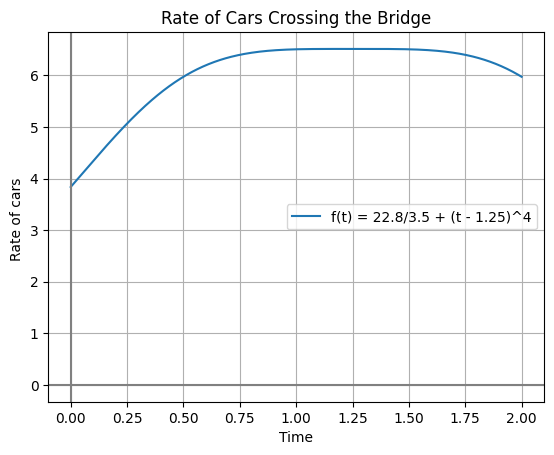

In [1]:
#1(a)
import matplotlib.pyplot as plt
import numpy as np
t = np.linspace(0, 2, 400)
ft = 22.8/(3.5 + (t - 1.25)**4)
plt.plot(t, ft, label='f(t) = 22.8/3.5 + (t - 1.25)^4')
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Time')
plt.ylabel('Rate of cars ')
plt.title('Rate of Cars Crossing the Bridge')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#1(b)
import sympy as sp
import numpy as np
t = sp.symbols('t')
def solve(f,a,b,N):
  sum = 0
  r = (b-a)/N
  for i in range(0,N):
    t_i = np.random.uniform(a,b)
    sum += f.subs(t,t_i)
  sol = r*sum
  display(sp.Integral(f,(t,a,b)))
  print('= ', sol)
eqn = 22.8/3.5 + (t - 1.25)**4
a = 0
b = 2
N = 10000
solve(eqn,a,b,N)

Integral(2.44140625*(0.8*t - 1)**4 + 6.51428571428571, (t, 0, 2))

=  13.6740615122932


N = 10
Simpson's result: I1 = 3.80677939326480, I2 = 0.265328932409831
Trapezoidal result: I1 = 3.86103995511202, I2 = 0.265717966998271

N = 100
Simpson's result: I1 = 3.80553745613563, I2 = 0.265280271311555
Trapezoidal result: I1 = 3.80609648765444, I2 = 0.265285077005592

N = 1000
Simpson's result: I1 = 3.80553726104830, I2 = 0.265280129471476
Trapezoidal result: I1 = 3.80554285378188, I2 = 0.265280180254473



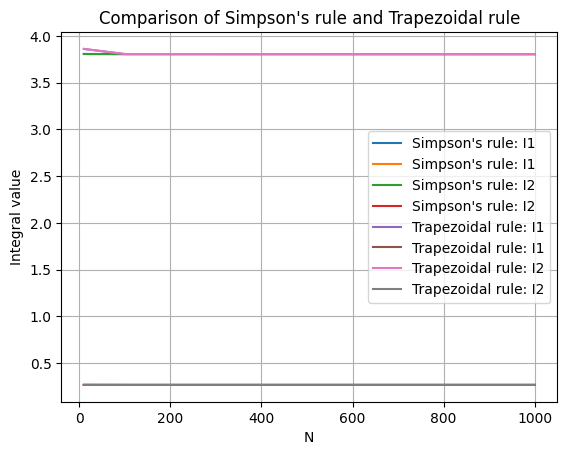

In [ ]:
#2(a,b,c)
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import math

def f1(x):
    return smp.sqrt(2 + x**3) * x

def f2(x):
    return (smp.log(x))**(3/2)
#a
def simpsons_rule(f, a, b, N):
    h = (b - a) / N
    x_i = a
    sum = f(a) + f(b)

    for i in range(1, N):
        x_i += h
        if i % 2 == 0:
            sum += 2 * f(x_i)
        else:
            sum += 4 * f(x_i)
    r1 =   (h / 3) * sum
    r1 = r1.evalf()
    return r1
#b
def trapezoidal_rule(f, a, b, N):
    h = (b - a) / N
    sum = 0.5 * (f(a) + f(b))

    for i in range(1, N):
        sum += f(a + i * h)


    r2 = h * sum
    r2 = r2.evalf()
    return r2

N_values = [10, 100, 1000]
results_simpsons = []
results_trapezoidal = []

for N in N_values:
    results_simpsons.append([simpsons_rule(f1, -1, 2, N), simpsons_rule(f2, 1, 2, N)])
    results_trapezoidal.append([trapezoidal_rule(f1, -1, 2, N), trapezoidal_rule(f2, 1, 2, N)])
    print(f"N = {N}")
    print(f"Simpson's result: I1 = {simpsons_rule(f1, -1, 2, N)}, I2 = {simpsons_rule(f2, 1, 2, N)}")
    print(f"Trapezoidal result: I1 = {trapezoidal_rule(f1, -1, 2, N)}, I2 = {trapezoidal_rule(f2, 1, 2, N)}")
    print()
#c
plt.plot(N_values, results_simpsons, label="Simpson's rule: I1")
plt.plot(N_values, results_simpsons, label="Simpson's rule: I2")
plt.plot(N_values, results_trapezoidal, label="Trapezoidal rule: I1")
plt.plot(N_values, results_trapezoidal, label="Trapezoidal rule: I2")
plt.xlabel('N')
plt.ylabel('Integral value')
plt.title('Comparison of Simpson\'s rule and Trapezoidal rule')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#2(d)
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

x = sp.symbols('x')
I1 = sp.integrate(sp.sqrt(2 + x**3) * x, x)
I2 = sp.integrate(sp.log(x)**(3/2), x)
x_vals = np.linspace(-1, 2, 100)

y1 = sp.lambdify(x, I1, modules=['numpy'])
y2 = sp.lambdify(x, I2, modules=['numpy'])

plt.plot(x_vals, y1(x_vals), label='I1')
plt.plot(x_vals, y2(x_vals), label='I2')
plt.xlabel('x')
plt.ylabel('Integral value')
plt.title('Solution of Integrals')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#2(d)
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
x = sp.symbols('x')
f1 = (sp.sqrt(2 + x**3))*x
f2 = (sp.ln(x))**(3/2)
I1 = sp.integrate(f1, x)
I2 = sp.integrate(f2, x)

print("Integral of l1 is: ", I1)
print("Integral of l2 is: ", I2)
f1_np = sp.lambdify(x, I1, "numpy")
f2_np = sp.lambdify(x, I2, "numpy")

x_vals = np.linspace(1, 10, 400)
y_vals_f1 = f1_np(x_vals)
y_vals_f2 = f2_np(x_vals)

plt.plot(x_vals, y_vals_f1, label='I1')
plt.plot(x_vals, y_vals_f2, label='I2')
plt.title('Plot of I1')
plt.title('Plot of I2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#2(d)
import sympy as smp
import numpy as np
import mpmath as mpm
import matplotlib.pyplot as plt

x = smp.symbols('x')
f = smp.sqrt(2 + x**3) * x
h = smp.log(x)**(3/2)
f = smp.integrate(f,x)
h = smp.integrate(h,x)

d = np.arange(-5, 5, 0.1)
f = smp.lambdify(x,f)
h = smp.lambdify(x,h)

plt.title('Plot of Functions')
plt.axvline(x=0, c='gray')
plt.axhline(y=0, c='gray',linestyle=':')
plt.plot(d, f(d), c='red', linestyle='dashed', label='I1')
plt.plot(d, h(d), c='green', linestyle='-', label='I2')
plt.ylim(-4, 4)
plt.xlim(-10,10)
plt.xlabel('x-axis',c='blue')
plt.ylabel('y-axis',c='red')
plt.legend(loc='upper right')
plt.show()

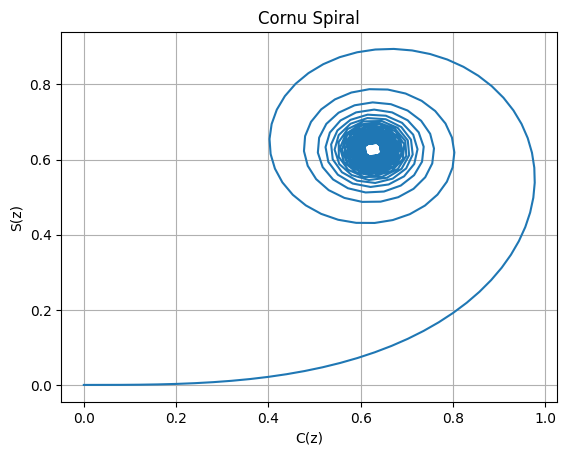

In [ ]:
#3
import numpy as np
import sympy as smp
import math
import matplotlib.pyplot as plt

def trapezoidal(f, a, b, n):
    h = (b - a) / n
    s = f(a) + f(b)
    for i in range(1, n):
        s += 2 * f(a + i * h)
    return s * h / 2

def Cf(x):
    return np.cos(x**2)
def Sf(x):
    return np.sin(x**2)

z_values = np.linspace(0, 20, 500)
C_values = []
S_values = []
for j in z_values:
  C_values.append(trapezoidal(Cf, 0, j, 1000))
  S_values.append(trapezoidal(Sf, 0, j, 1000))


plt.plot(C_values, S_values)
plt.title('Cornu Spiral')
plt.xlabel('C(z)')
plt.ylabel('S(z)')
plt.grid()
plt.show()

The roots of the function in the interval [-5,5] are:
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = -4.14
x = 4.64
x = 4.64
x = 1.30
x = 1.30
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -0.803
x = -4.14
x = -4.14
x = 4.64
x = 4.64
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = 1.30
x = -0.803
x = -0.803
x = -4.14
x = -4.14
x = 4.64
x = 4.64
x = 4.64
x = 4.64
x = 4.64
x = 4.64
x = 4.64
x = 4.64
x = 4.64
x = 4.64
x = 4.64
x = 4.64
x = 4.64
x = 4.64
x = 4.64


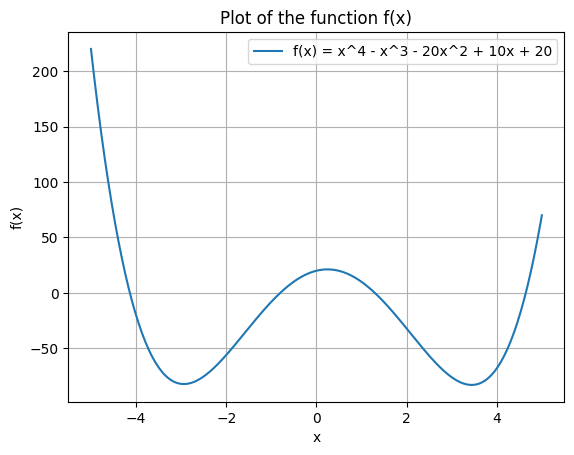

In [ ]:
#4(a)
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

x = smp.symbols('x')
f = x**4 - x**3 - 20*x**2 + 10*x + 20
df = smp.diff(f, x)
eps = 1e-6

def NM(f, df, x0):
    while abs(f.subs(x,x0)) >= eps:
        r = f.subs(x,x0)/(df.subs(x,x0))
        x0 -= r
    return x0

interval = np.linspace(-5, 5, 100)
roots = []
for x0 in interval:
    root = NM(f, df, x0)
    if root not in roots:
        roots.append(root)

print('The roots of the function in the interval [-5,5] are:')
for root in roots:
    print(f'x = {root.evalf(3)}')


f_lambdified = smp.lambdify(x, f, "numpy")
x_vals = np.linspace(-5, 5, 400)
y_vals = f_lambdified(x_vals)
plt.plot(x_vals, y_vals, label='f(x) = x^4 - x^3 - 20x^2 + 10x + 20')
plt.title('Plot of the function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#4(d)
import sympy as smp
import numpy as np
x = smp.symbols('x')
f = (x**3)*smp.exp(-(x**2)) + smp.sin(3*x)
f1 = smp.diff(f,x)
f2 = smp.diff(f1, x)
a = -2
b = 2
cp = [smp.nsolve(f1, x, a), smp.nsolve(f1, x, b)]
points = cp + [a, b]
values = []
for j in points:
  values.append(f.subs(x, j))
max_val = max(values)
print('The maximum value is =', max_val)

The maximum value is = 0.999927878359178


In [5]:
#5(a,b,c)
import sympy as smp
import numpy as np
import math
import scipy.integrate as intrg

def Beta_1(x, y):

  def equation(t):
    return 2 * (math.sin(t) ** (2 * x - 1)) * (math.cos(t) ** (2 * y - 1))

  a, b = 0, math.pi/2
  res1 = intrg.quad(equation, a, b)
  return res1[0]


def Gamma(x):

  def equation(x):
    return x**(x-1) * math.exp(-x)

  a, b = 0, math.inf
  res2 = intrg.quad(equation, a, b)
  return res2[0]

def Beta_2(x, y):

  return math.gamma(x) * math.gamma(y) / math.gamma(x + y)


N_val = [10, 100, 1000]
x, y = 5, 2

for N in N_val:
  output_a = Beta_1(x, y)
  output_b = Beta_2(x, y)
  error = (abs(output_a-output_b)/output_a)*100

  print(f"N = {N}")
  print(f"Beta_a(5, 2): {output_a}")
  print(f"Beta_b(5, 2): {output_b}")
  print(f"Difference: {(output_a-output_b)}")
  print(f'error: {error}%')
  print()


N = 10
Beta_a(5, 2): 0.03333333333333333
Beta_b(5, 2): 0.03333333333333333
Difference: 0.0
error: 0.0%

N = 100
Beta_a(5, 2): 0.03333333333333333
Beta_b(5, 2): 0.03333333333333333
Difference: 0.0
error: 0.0%

N = 1000
Beta_a(5, 2): 0.03333333333333333
Beta_b(5, 2): 0.03333333333333333
Difference: 0.0
error: 0.0%

